In [36]:
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os 
from sklearn.feature_selection import chi2
from scipy import stats
Airbnb = pd.read_csv("Airbnb (1).csv")

In [37]:
Airbnb=Airbnb[Airbnb.state.isin(['NY','Ny','ny'])]

In [38]:
Airbnb.shape

(48883, 106)

In [39]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48883 entries, 0 to 48894
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 39.9+ MB


In [40]:
percent_missing = Airbnb.isnull().sum() * 100 / len(Airbnb) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
df=missing_value_df[missing_value_df['percent_missing']!=0]
df=df.sort_values('percent_missing',ascending=False)
df

,percent_missing
thumbnail_url,100.000000
medium_url,100.000000
host_acceptance_rate,100.000000
xl_picture_url,100.000000
jurisdiction_names,99.979543
license,99.957040
square_feet,99.165354
monthly_price,89.266207
weekly_price,87.721703
notes,58.701389


In [41]:
#drop non-business and missing valuse>80% columns
Airbnb=Airbnb.drop(columns=['thumbnail_url','medium_url','host_acceptance_rate','xl_picture_url','id',
'jurisdiction_names','monthly_price','weekly_price','scrape_id','calendar_last_scraped','is_business_travel_ready',
'license', 'square_feet', 'name', 'space', 'picture_url','host_id', 'transit','calendar_updated','latitude',
'host_url','host_name','host_location','country_code','country','bed_type','host_name','name','state',
'notes','house_rules','summary','description','interaction','host_about','neighborhood_overview','street',
'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood','access','requires_license',
'listing_url','experiences_offered','last_scraped','neighbourhood','market','smart_location','longitude',
'neighbourhood_cleansed','neighbourhood_group_cleansed','amenities','has_availability','host_verifications'])
#'market','security_deposit','cleaning_fee','host_neighbourhood','host_since',host_response_time'])                     

In [42]:
percent_missing = Airbnb.isnull().sum() * 100 / len(Airbnb) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
df1=missing_value_df[missing_value_df['percent_missing']!=0]
df1=df1.sort_values('percent_missing',ascending=False)
df1

,percent_missing
security_deposit,35.417221
host_response_rate,33.467668
host_response_time,33.467668
review_scores_location,22.666367
review_scores_value,22.662275
review_scores_checkin,22.658184
review_scores_accuracy,22.621361
review_scores_communication,22.611133
review_scores_cleanliness,22.586584
review_scores_rating,22.543625


In [43]:
Airbnb.shape

(48883, 54)

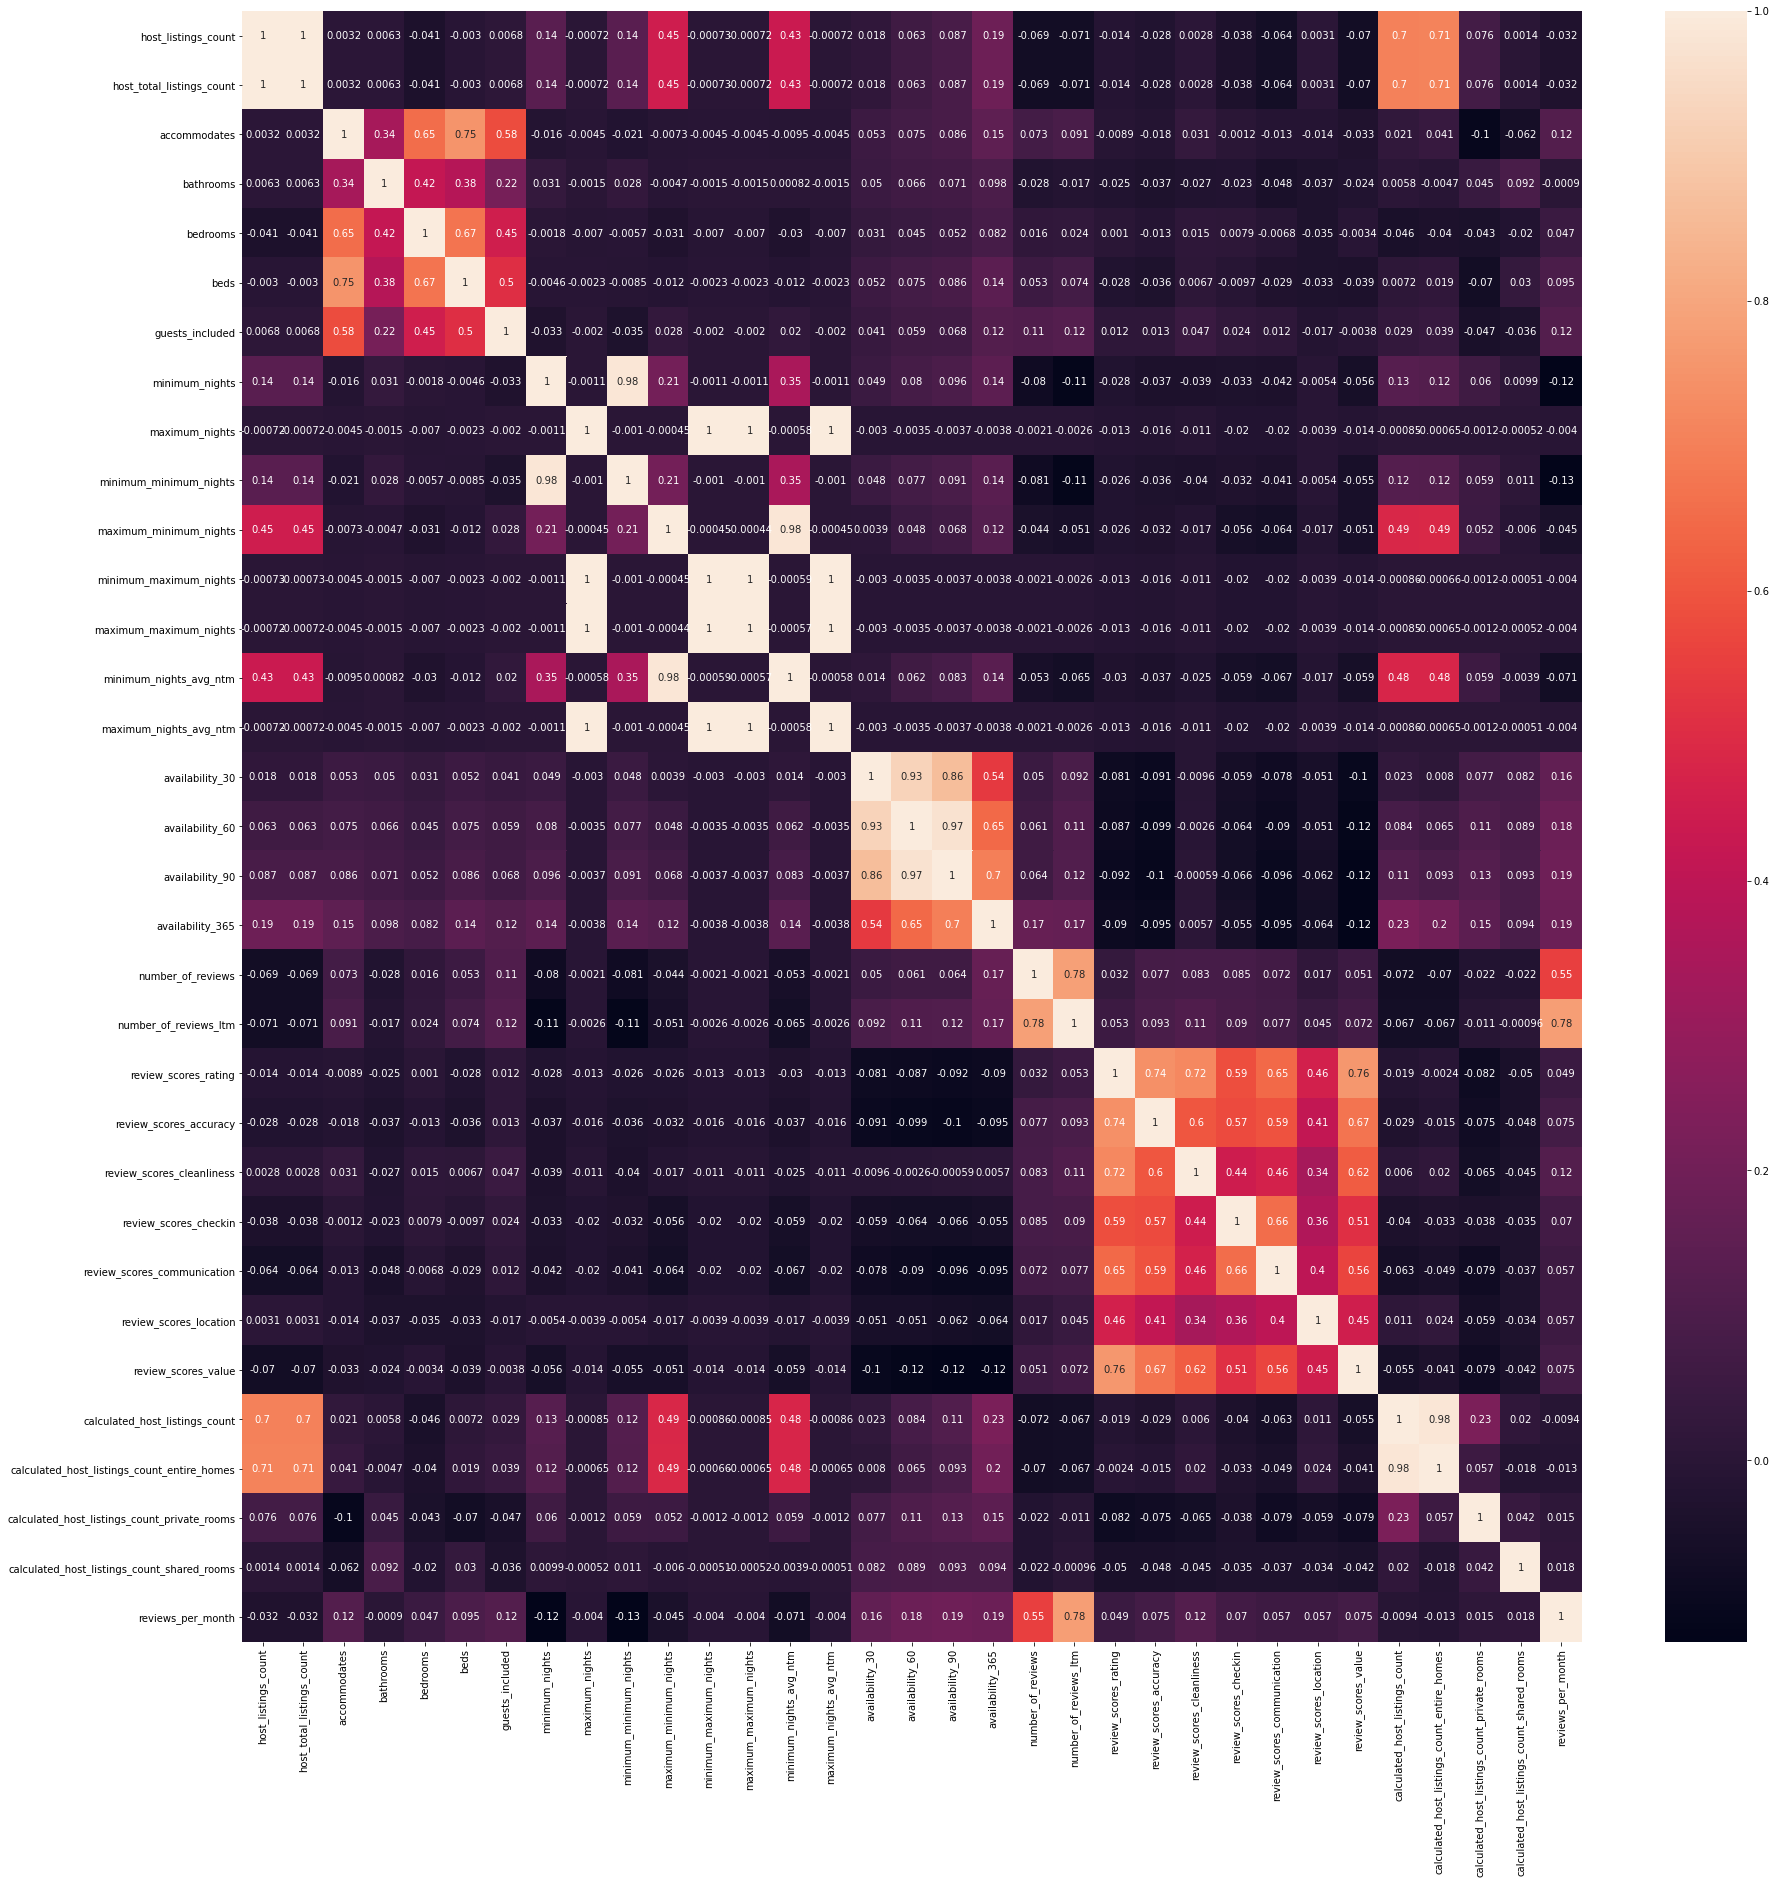

In [44]:
#correlation matrix check correlation between numeric variable
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(Airbnb.corr(),annot = True)
plt.show()

In [45]:
#drop highly correlated columns
Airbnb=Airbnb.drop(columns=['host_listings_count','bathrooms','bedrooms','beds','number_of_reviews_ltm',
'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
'availability_60','availability_90','calculated_host_listings_count_entire_homes','guests_included',
 'review_scores_accuracy','reviews_per_month','host_total_listings_count','review_scores_cleanliness',
'review_scores_checkin','review_scores_value','bathrooms','bedrooms','beds'])

In [46]:
percent_missing = Airbnb.isnull().sum() * 100 / len(Airbnb) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
df1=missing_value_df[missing_value_df['percent_missing']!=0]
df1=df1.sort_values('percent_missing',ascending=False)
df1

,percent_missing
security_deposit,35.417221
host_response_time,33.467668
host_response_rate,33.467668
review_scores_location,22.666367
review_scores_communication,22.611133
review_scores_rating,22.543625
cleaning_fee,21.766258
first_review,20.559295
last_review,20.559295
zipcode,1.053536


In [47]:
#chi-square test check catagorical variable correlation
df_cat=Airbnb[['host_response_time', 'property_type','room_type', 'cancellation_policy','review_scores_rating']]
mycrosstab=pd.crosstab([df_cat.host_response_time, df_cat.property_type,
    df_cat.room_type,df_cat.cancellation_policy],
[df_cat.host_response_time, df_cat.property_type,
 df_cat.room_type, df_cat.cancellation_policy ],
normalize='index',dropna=True)
stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
p

0.23956260801288137

In [48]:
#drop rows with na value
Airbnb=Airbnb.dropna(subset=['host_is_superhost','review_scores_location','zipcode',
'review_scores_rating','host_identity_verified','review_scores_communication'])

In [49]:
percent_missing = Airbnb.isnull().sum() * 100 / len(Airbnb) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
df2=missing_value_df[missing_value_df['percent_missing']!=0]
df2=df2.sort_values('percent_missing',ascending=False)
df2

,percent_missing
security_deposit,30.228142
host_response_time,27.229934
host_response_rate,27.229934
cleaning_fee,15.911097
city,0.125705
first_review,0.005349
last_review,0.005349


In [50]:
Airbnb= Airbnb.dropna(subset=['first_review','last_review','city'])

In [51]:
percent_missing = Airbnb.isnull().sum() * 100 / len(Airbnb) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
df3=missing_value_df[missing_value_df['percent_missing']!=0]
df3=df3.sort_values('percent_missing',ascending=False)
df3

,percent_missing
security_deposit,30.238350
host_response_time,27.241564
host_response_rate,27.241564
cleaning_fee,15.915908


In [52]:
Airbnb.shape

(37340, 35)

In [53]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37340 entries, 0 to 48799
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    37340 non-null  object 
 1   host_response_time                            27168 non-null  object 
 2   host_response_rate                            27168 non-null  object 
 3   host_is_superhost                             37340 non-null  object 
 4   host_has_profile_pic                          37340 non-null  object 
 5   host_identity_verified                        37340 non-null  object 
 6   city                                          37340 non-null  object 
 7   zipcode                                       37340 non-null  object 
 8   is_location_exact                             37340 non-null  object 
 9   property_type                                 37340 non-null 

In [54]:
#fill null and change string to numeric
Airbnb["host_response_time"].fillna("Null",inplace=True)
Airbnb['security_deposit'].fillna('0',inplace=True)
Airbnb['extra_people'].fillna('0',inplace=True)
Airbnb['cleaning_fee'].fillna('0',inplace=True)
Airbnb['host_response_rate'].fillna('0',inplace=True)
#Airbnb['price'].fillna('0',inplace=True)

In [55]:
Airbnb['zipcode']=Airbnb['zipcode'].str.replace('-', '').str.replace('.','').str.replace('\n','').str[:5]
Airbnb['security_deposit']=Airbnb['security_deposit'].str.replace('$', '').str.replace('.00','').str.replace(',','')
Airbnb['extra_people']=Airbnb['extra_people'].str.replace('$', '').str.replace('.00','')
Airbnb['cleaning_fee']=Airbnb['cleaning_fee'].str.replace('$', '').str.replace('.00','')
Airbnb['price']=Airbnb['price'].str.replace('$', '').str.replace('.00','').str.replace(',','')
Airbnb['host_response_rate']=Airbnb['host_response_rate'].str.replace('%', '')

In [56]:
Airbnb['security_deposit'].replace('', '0', inplace=True)
Airbnb['extra_people'].replace('', '0', inplace=True)
Airbnb['cleaning_fee'].replace('', '0', inplace=True)
Airbnb['host_response_rate'].replace('', '0', inplace=True)
Airbnb['price'].replace('', '0', inplace=True)

In [57]:
Airbnb['security_deposit'] = Airbnb['security_deposit'].astype(int)
Airbnb['extra_people'] = Airbnb['extra_people'].astype(int)
Airbnb['cleaning_fee'] = Airbnb['cleaning_fee'].astype(int)
Airbnb['host_response_rate'] = Airbnb['host_response_rate'].astype(int)
Airbnb['price'] = Airbnb['price'].astype(int)

In [58]:
#t-test check boolean variable
t1=stats.ttest_ind(Airbnb['review_scores_rating'][Airbnb['host_is_superhost'] == 't'],
                Airbnb['review_scores_rating'][Airbnb['host_is_superhost'] == 'f'])
t2=stats.ttest_ind(Airbnb['review_scores_rating'][Airbnb['host_has_profile_pic'] == 't'],
                Airbnb['review_scores_rating'][Airbnb['host_has_profile_pic'] == 'f'])
t3=stats.ttest_ind(Airbnb['review_scores_rating'][Airbnb['host_identity_verified'] == 't'],
                Airbnb['review_scores_rating'][Airbnb['host_identity_verified'] == 'f'])
t4=stats.ttest_ind(Airbnb['review_scores_rating'][Airbnb['is_location_exact'] == 't'],
                Airbnb['review_scores_rating'][Airbnb['is_location_exact'] == 'f'])
t5=stats.ttest_ind(Airbnb['review_scores_rating'][Airbnb['instant_bookable'] == 't'],
                Airbnb['review_scores_rating'][Airbnb['instant_bookable'] == 'f'])
t6=stats.ttest_ind(Airbnb['review_scores_rating'][Airbnb['require_guest_phone_verification'] == 't'],
                Airbnb['review_scores_rating'][Airbnb['require_guest_phone_verification'] == 'f'])
t7=stats.ttest_ind(Airbnb['review_scores_rating'][Airbnb['require_guest_profile_picture'] == 't'],
                Airbnb['review_scores_rating'][Airbnb['require_guest_profile_picture'] == 'f'])
print(t1,t2,t3,t4,t5,t6,t7)

Ttest_indResult(statistic=36.88454609611915, pvalue=1.4966519931735668e-292) Ttest_indResult(statistic=4.157501376705014, pvalue=3.224645605718343e-05) Ttest_indResult(statistic=12.436926842327344, pvalue=1.9365155735007867e-35) Ttest_indResult(statistic=2.5457440375875566, pvalue=0.01090849457572894) Ttest_indResult(statistic=-9.609368146957115, pvalue=7.737194892021154e-22) Ttest_indResult(statistic=3.1471147525970675, pvalue=0.0016501984539467962) Ttest_indResult(statistic=1.453444240652865, pvalue=0.14610885510106447)


In [60]:
#drop boolean variable with high correlation
Airbnb=Airbnb.drop(columns=['require_guest_profile_picture'])
Airbnb=Airbnb.dropna(subset=['zipcode'])
Airbnb['zipcode'] = Airbnb['zipcode'].astype(int)

In [61]:
#change boolean to 0&1
varlist =  ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 
            'instant_bookable','require_guest_phone_verification']

# Defining the map function
def binary_map(x):
    return x.map({'t': 1, "f": 0})

# Applying the function to the housing list
Airbnb[varlist] = Airbnb[varlist].apply(binary_map)

In [62]:
Airbnb = Airbnb.sort_values(["zipcode"], ascending=True)

In [63]:
#Airbnb['zipcode']=Airbnb['zipcode'].str.replace('-', '').str.replace('.','').str.replace('\n','').str[:5]
Airbnb=Airbnb.dropna(subset=['zipcode'])

In [64]:
Airbnb.shape

(26424, 34)

In [65]:
#check duplicate
duplicate = Airbnb[Airbnb.duplicated()]
duplicate

,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,city,zipcode,is_location_exact,property_type,...,last_review,review_scores_rating,review_scores_communication,review_scores_location,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
26881,2017-08-29,within a few hours,80,0,1,0,Brooklyn,11236,1,House,...,2018-01-02,100.0,8.0,10.0,0,strict_14_with_grace_period,0,4,3,0


In [66]:
#drop duplicate
Airbnb=Airbnb.drop_duplicates()

In [67]:
duplicate = Airbnb[Airbnb.duplicated()]
duplicate

,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,city,zipcode,is_location_exact,property_type,...,last_review,review_scores_rating,review_scores_communication,review_scores_location,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms


In [68]:
#change string to date time
Airbnb['host_since']=Airbnb['host_since'].str.replace('-', '')
Airbnb['first_review']=Airbnb['first_review'].str.replace('-', '')
Airbnb['last_review']=Airbnb['last_review'].str.replace('-', '')
Airbnb['host_since'] = pd.to_datetime(Airbnb['host_since'], format='%Y%m%d')
Airbnb['first_review'] = pd.to_datetime(Airbnb['first_review'], format='%Y%m%d')
Airbnb['last_review'] = pd.to_datetime(Airbnb['last_review'], format='%Y%m%d')

In [69]:
from datetime import datetime
today = datetime.today()
Airbnb['host_since'] = Airbnb['host_since'].apply(lambda x: (today - x).days // 365)
Airbnb['review_diff']=(Airbnb['last_review']-Airbnb['first_review'])//365

In [70]:
from datetime import datetime
import datetime as dt
Airbnb['review_diff']=(Airbnb['last_review']-Airbnb['first_review']).dt.days

In [71]:
Airbnb = Airbnb.drop(['last_review', 'first_review'], 1)

In [72]:
#set zipcode as index
Airbnb=Airbnb.set_index('zipcode')

In [73]:
#change city accroding to zipcode
Airbnb.loc[10001:10282, 'city']='Manhattan'
Airbnb.loc[10301:10314, 'city']='Staten'
Airbnb.loc[10451:10550, 'city']='Bronx'
Airbnb.loc[11101:11109, 'city']='Queens'
Airbnb.loc[11201:11249, 'city']='Brooklyn'
Airbnb.loc[11351:11694, 'city']='Queens'

In [74]:
Airbnb.city.unique()

array(['Manhattan', 'Staten', 'Bronx', 'Floral Park', 'Queens',
       'Brooklyn'], dtype=object)

In [75]:
#check outliers
Airbnb.describe().T.head(50)

,count,mean,std,min,25%,50%,75%,max
host_since,26423.0,6.926125,2.006686e+00,3.0,5.0,7.0,8.0,1.300000e+01
host_response_rate,26423.0,61.110548,4.627690e+01,0.0,0.0,93.0,100.0,1.000000e+02
host_is_superhost,26423.0,0.230822,4.213665e-01,0.0,0.0,0.0,0.0,1.000000e+00
host_has_profile_pic,26423.0,0.998448,3.936152e-02,0.0,1.0,1.0,1.0,1.000000e+00
host_identity_verified,26423.0,0.639594,4.801272e-01,0.0,0.0,1.0,1.0,1.000000e+00
is_location_exact,26423.0,0.861257,3.456844e-01,0.0,1.0,1.0,1.0,1.000000e+00
accommodates,26423.0,2.856451,1.808069e+00,1.0,2.0,2.0,4.0,1.600000e+01
price,26423.0,117.675472,1.349622e+02,0.0,59.0,95.0,150.0,9.999000e+03
security_deposit,26423.0,31.718654,1.175339e+02,0.0,0.0,0.0,0.0,3.550000e+03
cleaning_fee,26423.0,42.634977,4.875435e+01,0.0,0.0,30.0,65.0,5.990000e+02


<AxesSubplot:xlabel='city', ylabel='maximum_nights'>

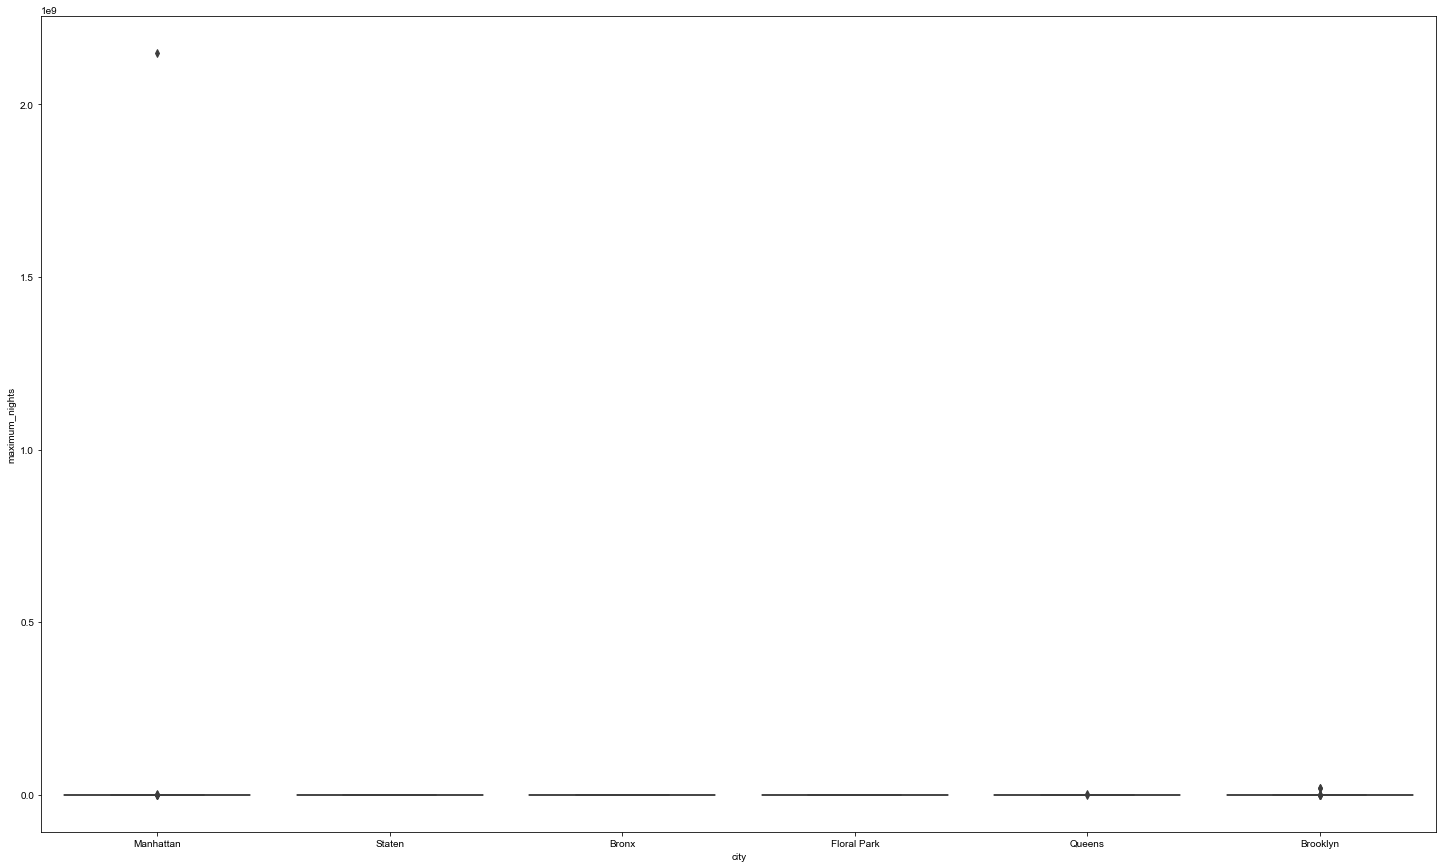

In [76]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.set_style("whitegrid")  
sns.boxplot(x = 'city', y = 'maximum_nights',data=Airbnb)

<AxesSubplot:xlabel='city', ylabel='price'>

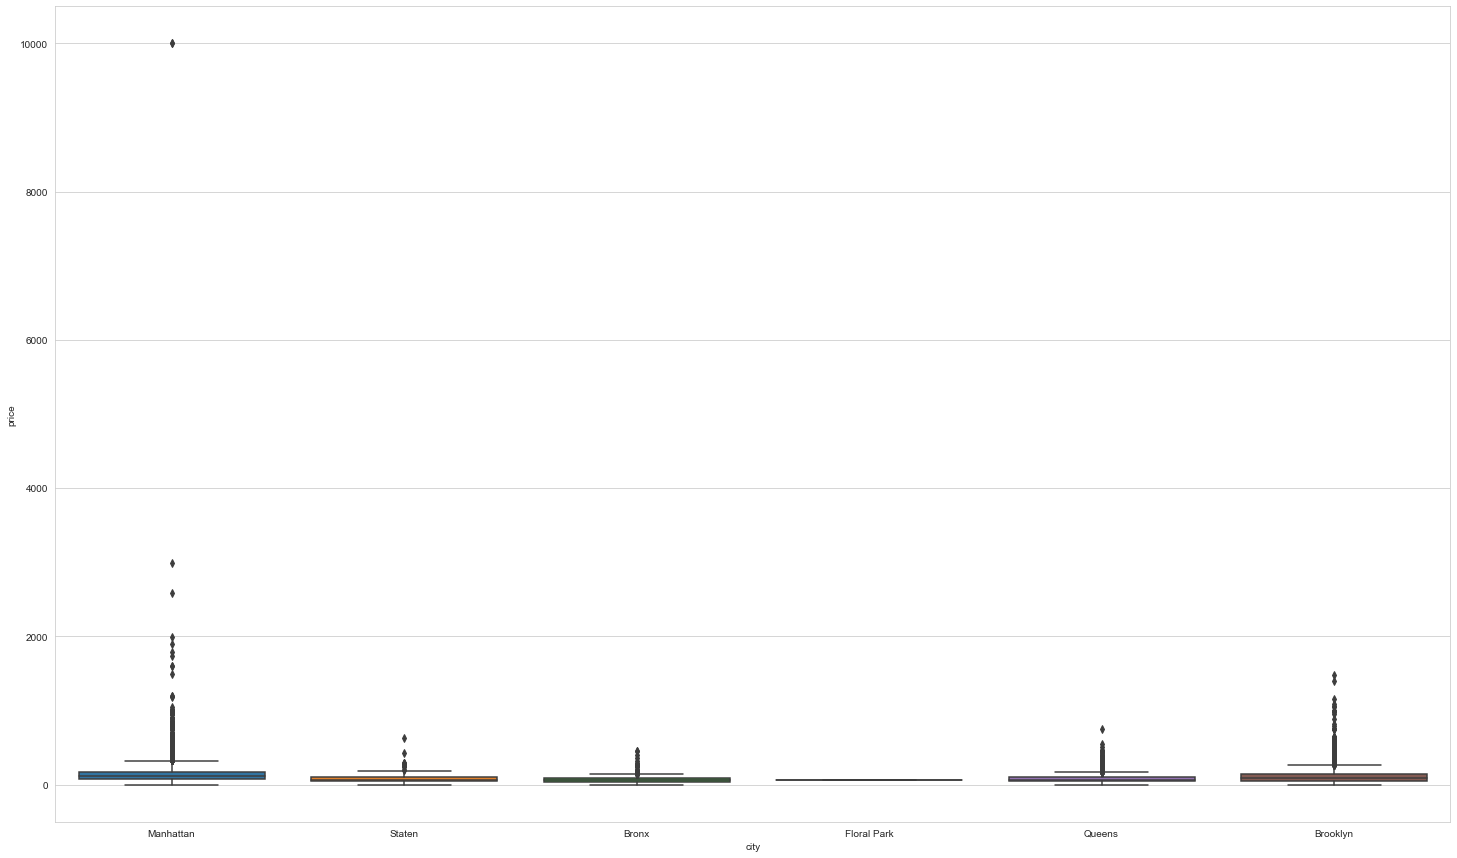

In [77]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.set_style("whitegrid")  
sns.boxplot(x = 'city', y = 'price',data=Airbnb)

In [78]:
Airbnb.maximum_nights.unique()

array([      1125,         31,       1124,          3,         29,
               90,         30,         32,         60,         80,
              365,         19,         21,          7,         11,
                9,         12,          5,         18,         14,
               10,         20,        180,        732,        190,
                4,        250,       1123,         28,         99,
              100,          1,         45,         24,          6,
                2,        220,         40,         15,        380,
              120,        112,        188,        300,        140,
                8,         34,         50,        200,        130,
               25,         75,        212,         48,       1000,
              150,         22,         16,        352,       1120,
              500,        235,         62,       1111,        400,
               17,         56,        125,        360,         35,
               33,         13,         27,        760,        

In [79]:
Airbnb.price.unique()

array([ 137,   85,   99,    0,   40,   75,  240,  128,  229,  139,  119,
        150,  345,  110,  130,   70,   76,   80,   89,  360,  158,  399,
        108,  795,  115,  226,  120,   82,  105,  149,   88,  290,  159,
        450,  195,   92,  170,  190,  220,  199,  186,  390,   96,  123,
        225,  169,  279,  140,  109,  175,   93,   65,   95,  250,  595,
        999,  163,  585,  153,  131,  228,  160,  181,  165,  208,  179,
         90,  189,  180,  185,  210,  145,  215,  275,   69,  230,  152,
        280,  375,  499,  172,  480,  205,  288,  350,  198,   84,  155,
        349,  219,   98,  255,   78,   63,  129,  135,   10,  370,  281,
         55,   57,  295,  790,  125,  118,   87,   97,   68,  188,  299,
        106,  785,   58,  260,  197,  416,  320,  146,  177,  495,  101,
         77,  124,   81,   20,   61,  154,   71,   79,  111,   41,  224,
         60,  245,  465,   59,  117,  174,   73,  102,  127,   32,  249,
         94,  151,   35,  430,  104,   91, 9999,  9

In [80]:
#delete outliers
Airbnb=Airbnb.loc[(Airbnb['maximum_nights'] <=2000) & (Airbnb['price'] < 1999)]

In [81]:
Airbnb.shape

(26401, 32)

In [82]:
Airbnb.describe()

,host_since,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,price,security_deposit,cleaning_fee,...,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,instant_bookable,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,review_diff
count,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,...,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000
mean,6.925988,61.116208,0.230825,0.998485,0.639521,0.861293,2.855877,116.627249,31.708610,42.601000,...,38.061589,94.068103,9.786447,9.544449,0.305405,0.039165,3.270747,1.024317,0.054922,748.651074
std,2.006687,46.276243,0.421368,0.038895,0.480148,0.345647,1.806476,100.641223,117.547537,48.648847,...,55.351402,7.593756,0.617914,0.732681,0.460588,0.193991,10.446202,2.471584,0.572884,680.968627
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,20.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,59.000000,0.000000,0.000000,...,4.000000,92.000000,10.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,204.000000
50%,7.000000,93.000000,0.000000,1.000000,1.000000,1.000000,2.000000,95.000000,0.000000,30.000000,...,14.000000,96.000000,10.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,589.000000
75%,8.000000,100.000000,0.000000,1.000000,1.000000,1.000000,4.000000,150.000000,0.000000,65.000000,...,50.000000,99.000000,10.000000,10.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1112.000000
max,13.000000,100.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1899.000000,3550.000000,599.000000,...,629.000000,100.000000,10.000000,10.000000,1.000000,1.000000,232.000000,101.000000,23.000000,3755.000000


In [84]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26401 entries, 10001 to 11694
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    26401 non-null  int64  
 1   host_response_time                            26401 non-null  object 
 2   host_response_rate                            26401 non-null  int64  
 3   host_is_superhost                             26401 non-null  int64  
 4   host_has_profile_pic                          26401 non-null  int64  
 5   host_identity_verified                        26401 non-null  int64  
 6   city                                          26401 non-null  object 
 7   is_location_exact                             26401 non-null  int64  
 8   property_type                                 26401 non-null  object 
 9   room_type                                     26401 non-n

In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Cate_df1=Airbnb[['host_response_time', 'property_type','room_type', 'cancellation_policy',
'city','host_since','host_response_rate','calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms','availability_30', 'minimum_nights','price',
'accommodates','security_deposit','extra_people','maximum_nights','minimum_nights_avg_ntm',
'maximum_nights_avg_ntm','review_diff','availability_365','review_scores_communication',
'review_scores_location']]

index1 = pd.MultiIndex.from_product([['host_since','host_response_rate',
'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'
,'availability_30', 'minimum_nights','price','accommodates','security_deposit',
'extra_people','maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
'review_diff','availability_365','review_scores_communication','review_scores_location'],
['host_response_time', 'property_type','room_type', 'cancellation_policy','city']],
names=['cont', 'cat'])

index1

MultiIndex([(                                  'host_since', ...),
            (                                  'host_since', ...),
            (                                  'host_since', ...),
            (                                  'host_since', ...),
            (                                  'host_since', ...),
            (                          'host_response_rate', ...),
            (                          'host_response_rate', ...),
            (                          'host_response_rate', ...),
            (                          'host_response_rate', ...),
            (                          'host_response_rate', ...),
            ('calculated_host_listings_count_private_rooms', ...),
            ('calculated_host_listings_count_private_rooms', ...),
            ('calculated_host_listings_count_private_rooms', ...),
            ('calculated_host_listings_count_private_rooms', ...),
            ('calculated_host_listings_count_private_rooms', .

In [96]:
#Anova check correlation between numeric and categorical variable
tables1 = []
for cont_var,cat_var in index1:
    model1 = ols('{} ~ {}'.format(cont_var,cat_var), data=Cate_df1).fit()
    anova_table1 = sm.stats.anova_lm(model1, typ=2)
    tables1.append(anova_table1)

In [98]:
df_anova1 = pd.concat(tables1, keys=index1, axis=0)
df_anova1.head(60)

sum_sq  \
host_since                                   host_response_time  host_response_time   1.410080e+03   
                                                                 Residual             1.048973e+05   
                                             property_type       property_type        1.731374e+03   
                                                                 Residual             1.045760e+05   
                                             room_type           room_type            1.264371e+03   
                                                                 Residual             1.050430e+05   
                                             cancellation_policy cancellation_policy  1.661676e+03   
                                                                 Residual             1.046457e+05   
                                             city                city                 2.965702e+03   
                                                                 Residual             1.033417e+05   
host_response_rate                           host_response_time  host_response_time   5.514563e+07   
                                                                 Residual             1.389727e+06   
                                             property_type       property_type        2.916032e+06   
                                                                 Residual             5.361932e+07   
                                             room_type           room_type            2.937144e+03   
                                                                 Residual             5.653242e+07   
                                             cancellation_policy cancellation_policy  4.439046e+06   
                                                                 Residual             5.209631e+07   
                                             city                city                 8.491867e+05   
                                                                 Residual             5.568617e+07   
calculated_host_listings_count_private_rooms host_response_time  host_response_time   4.336737e+03   
                                                                 Residual             1.569337e+05   
                                             property_type       property_type        1.190652e+04   
                                                                 Residual             1.493639e+05   
                                             room_type           room_type            2.567843e+04   
                                                                 Residual             1.355920e+05   
                                             cancellation_policy cancellation_policy  4.143020e+02   
                                                                 Residual             1.608561e+05   
                                             city                city                 2.055596e+03   
                                                                 Residual             1.592148e+05   
calculated_host_listings_count_shared_rooms  host_response_time  host_response_time   1.873015e+01   
                                                                 Residual             8.645633e+03   
                                             property_type       property_type        9.740782e+00   
                                                                 Residual             8.654622e+03   
                                             room_type           room_type            2.107394e+03   
                                                                 Residual             6.556969e+03   
                                             cancellation_policy cancellation_policy  1.048319e+01   
                                                                 Residual             8.653880e+03   
                                             city                city                 1.890753e+00   
            

In [99]:
df_anova1.tail(60)

sum_sq  \
minimum_nights_avg_ntm      host_response_time  host_response_time   7.536822e+04   
                                                Residual             2.337210e+07   
                            property_type       property_type        8.439302e+04   
                                                Residual             2.336307e+07   
                            room_type           room_type            1.224640e+05   
                                                Residual             2.332500e+07   
                            cancellation_policy cancellation_policy  1.149092e+05   
                                                Residual             2.333255e+07   
                            city                city                 8.671845e+04   
                                                Residual             2.336075e+07   
maximum_nights_avg_ntm      host_response_time  host_response_time   5.392942e+07   
                                                Residual             7.378821e+09   
                            property_type       property_type        3.581973e+07   
                                                Residual             7.396930e+09   
                            room_type           room_type            2.500653e+06   
                                                Residual             7.430249e+09   
                            cancellation_policy cancellation_policy  2.505745e+07   
                                                Residual             7.407693e+09   
                            city                city                 3.596703e+07   
                                                Residual             7.396783e+09   
review_diff                 host_response_time  host_response_time   2.419839e+09   
                                                Residual             9.822324e+09   
                            property_type       property_type        1.735926e+08   
                                                Residual             1.206857e+10   
                            room_type           room_type            4.704585e+07   
                                                Residual             1.219512e+10   
                            cancellation_policy cancellation_policy  1.000266e+09   
                                                Residual             1.124190e+10   
                            city                city                 7.426233e+06   
                                                Residual             1.223474e+10   
availability_365            host_response_time  host_response_time   1.282443e+08   
                                                Residual             3.169309e+08   
                            property_type       property_type        2.397051e+07   
                                                Residual             4.212046e+08   
                            room_type           room_type            7.411416e+05   
                                                Residual             4.444340e+08   
                            cancellation_policy cancellation_policy  2.038484e+07   
                                                Residual             4.247903e+08   
                            city                city                 9.259962e+06   
                                                Residual             4.359152e+08   
review_scores_communication host_response_time  host_response_time   4.683876e+01   
                                                Residual             1.003315e+04   
                            property_type       property_type        6.891500e+01   
                                                Residual             1.001108e+04   
                            room_type           room_type            1.817463e+01   
                                                Residual             1.006182e+04   
                            cancellation_policy cancellation_policy  4.151408e+0

array([[<AxesSubplot:title={'center':'host_since'}>,
        <AxesSubplot:title={'center':'host_response_rate'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count_private_rooms'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count_shared_rooms'}>],
       [<AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'accommodates'}>],
       [<AxesSubplot:title={'center':'security_deposit'}>,
        <AxesSubplot:title={'center':'extra_people'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'minimum_nights_avg_ntm'}>],
       [<AxesSubplot:title={'center':'maximum_nights_avg_ntm'}>,
        <AxesSubplot:title={'center':'review_diff'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'review_scores_communication'}>],
       

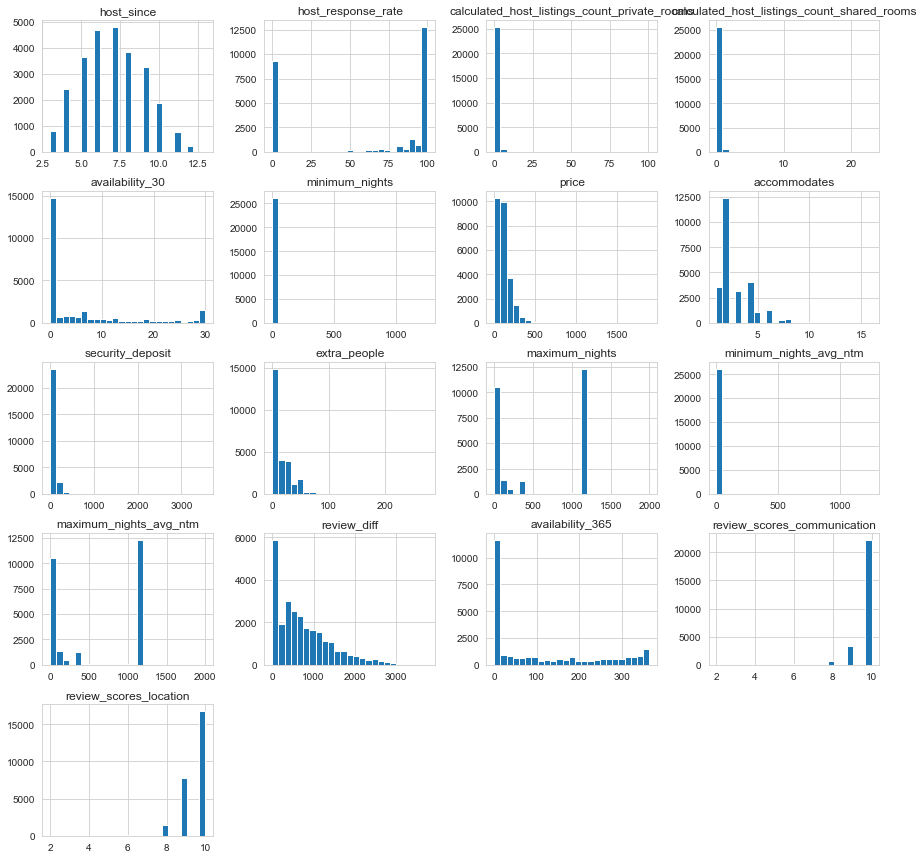

In [102]:
df11=Airbnb[['host_since','host_response_rate',
'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'
,'availability_30', 'minimum_nights','price','accommodates','security_deposit',
'extra_people','maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
'review_diff','availability_365','review_scores_communication','review_scores_location']]
df11.hist(bins = 25, figsize = (15,15))

In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df11)

array([[-1.956489  ,  0.84026978, -0.41444544, ...,  0.39937054,
         0.34560882,  0.62177061],
       [ 0.03688355,  0.84026978,  4.44083276, ...,  1.91645923,
        -1.27276975,  0.62177061],
       [-0.46145959, -1.32070716, -0.00983892, ..., -0.84818462,
        -1.27276975,  0.62177061],
       ...,
       [ 0.03688355,  0.84026978, -0.00983892, ...,  1.65462666,
         0.34560882,  0.62177061],
       [-0.95980273,  0.84026978, -0.00983892, ...,  1.95496402,
         0.34560882,  0.62177061],
       [-1.956489  ,  0.84026978, -0.41444544, ..., -0.50934247,
         0.34560882,  0.62177061]])

array([[<AxesSubplot:title={'center':'host_since'}>,
        <AxesSubplot:title={'center':'host_response_rate'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count_private_rooms'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count_shared_rooms'}>],
       [<AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'accommodates'}>],
       [<AxesSubplot:title={'center':'security_deposit'}>,
        <AxesSubplot:title={'center':'extra_people'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'minimum_nights_avg_ntm'}>],
       [<AxesSubplot:title={'center':'maximum_nights_avg_ntm'}>,
        <AxesSubplot:title={'center':'review_diff'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'review_scores_communication'}>],
       

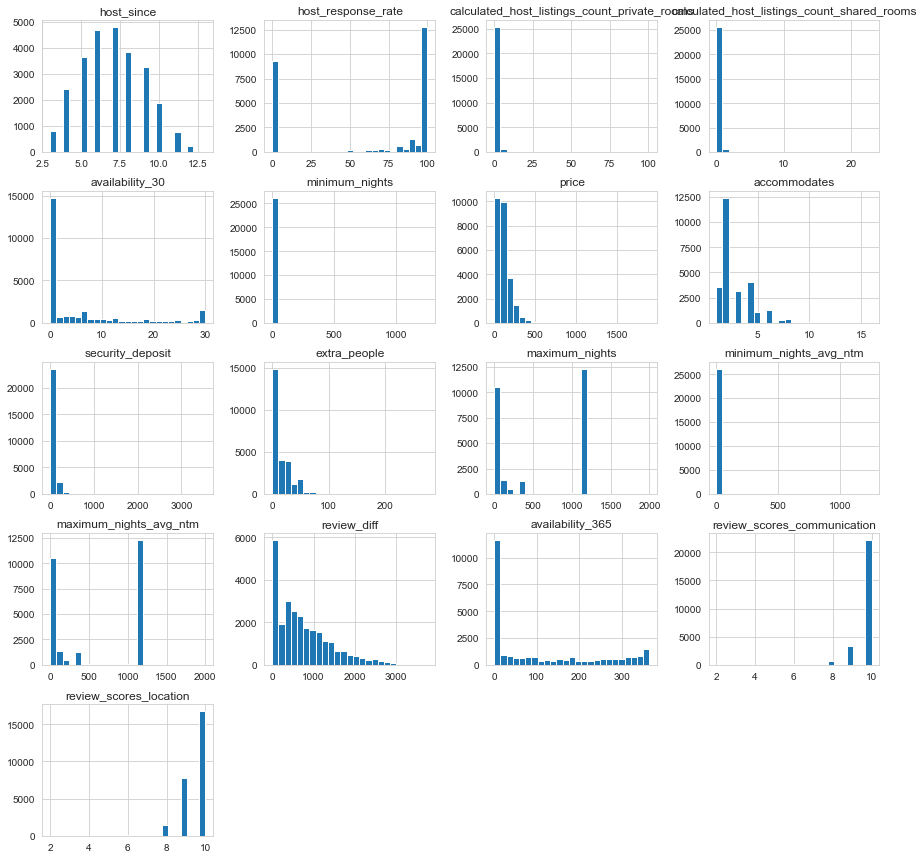

In [118]:
#hist plot check variable distribution
df11.hist(bins = 25, figsize = (15,15))

In [119]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'review_scores_rating', data=Airbnb, alpha=0.5)
        ax.set(xlabel=col, ylabel='review_rating')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

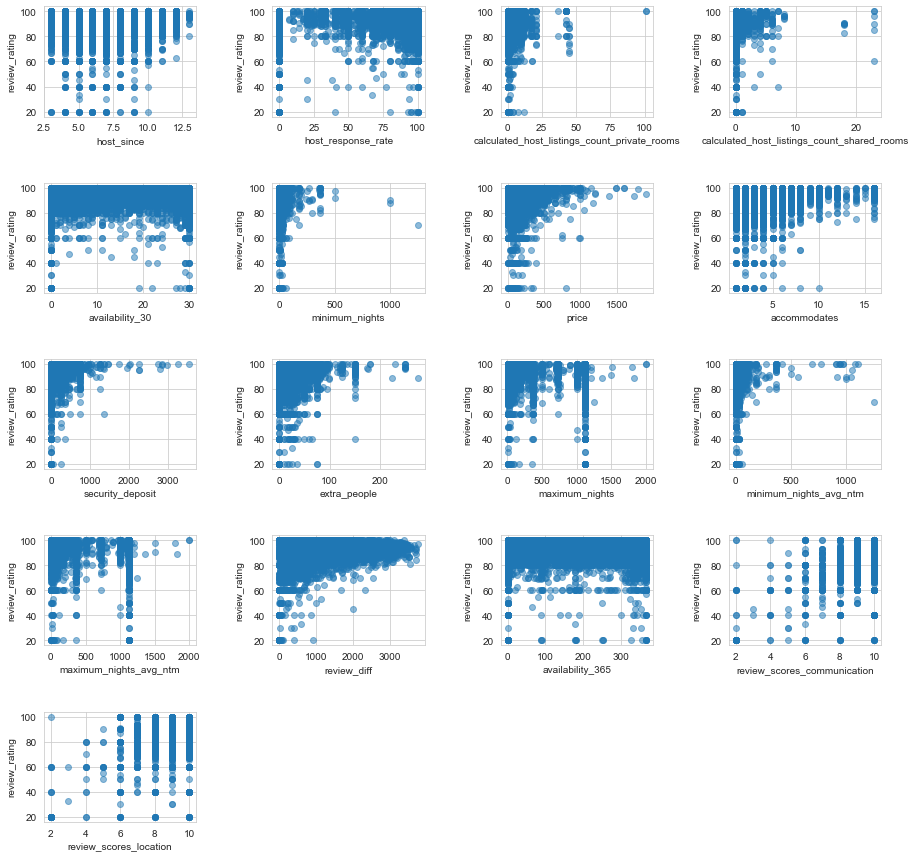

In [120]:
#scatter plot check correlation between independent and depemdent variables
import matplotlib.pyplot as plt
features = [i for i in df11.columns]
scatterplots(features, ncol=4, figsize=(15, 15))

<AxesSubplot:xlabel='city', ylabel='price'>

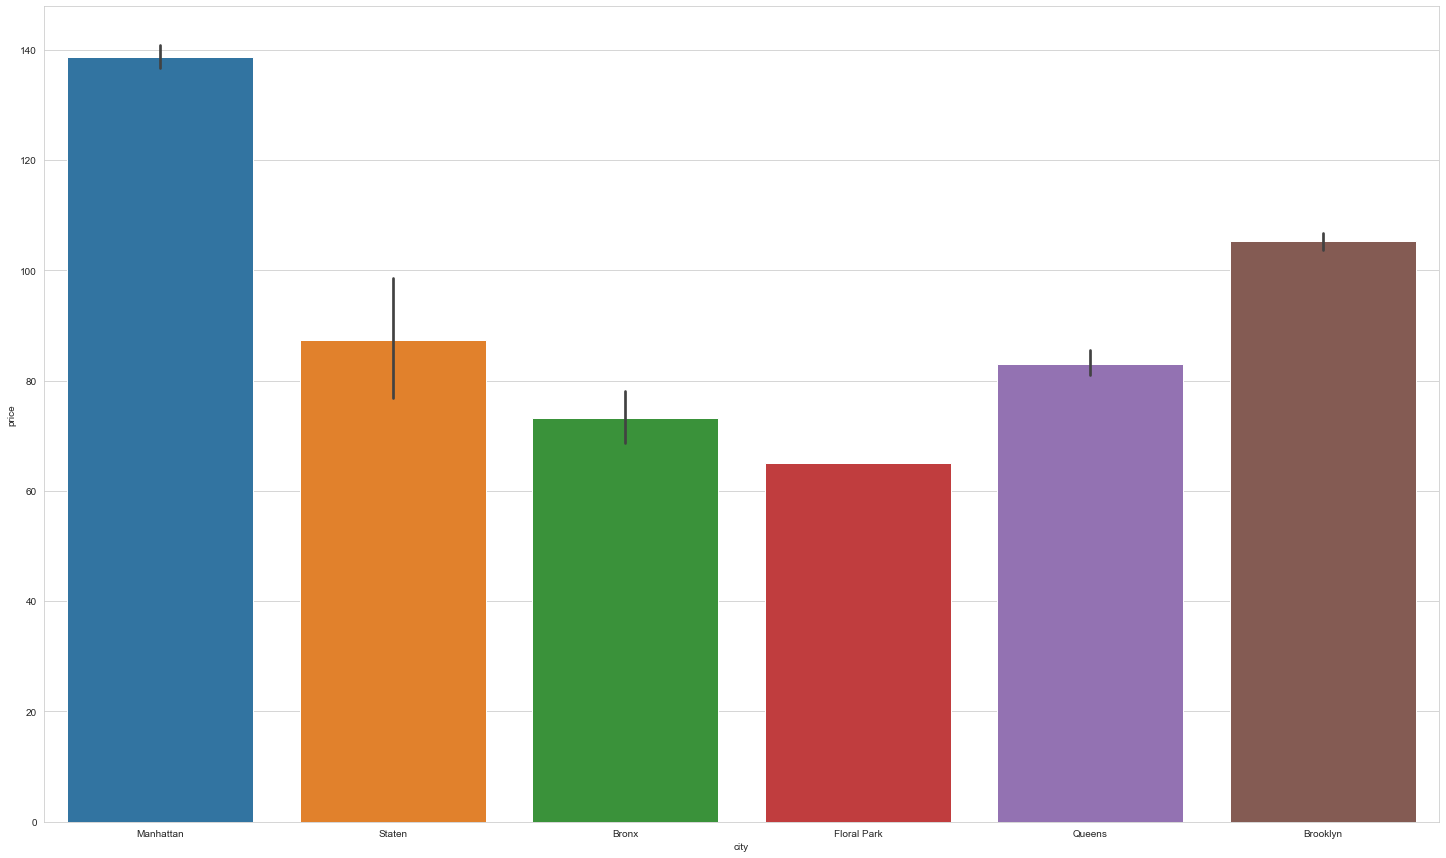

In [1002]:
#EDA on correlation between city and price
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(Airbnb['city'], Airbnb['price'])

<AxesSubplot:xlabel='host_response_time', ylabel='review_scores_rating'>

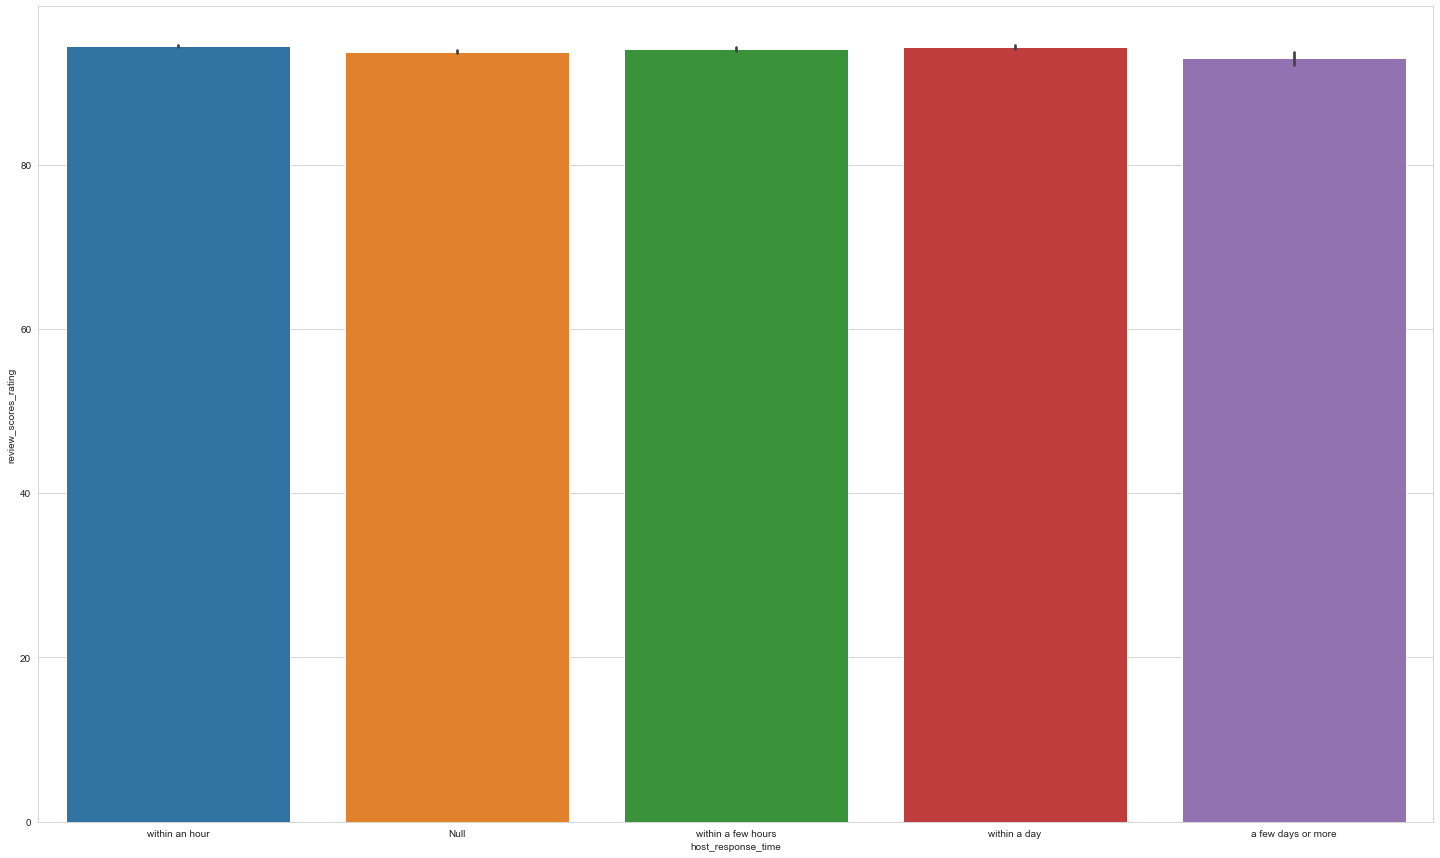

In [1005]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(Airbnb['host_response_time'], Airbnb['review_scores_rating'])

<AxesSubplot:xlabel='property_type', ylabel='review_scores_rating'>

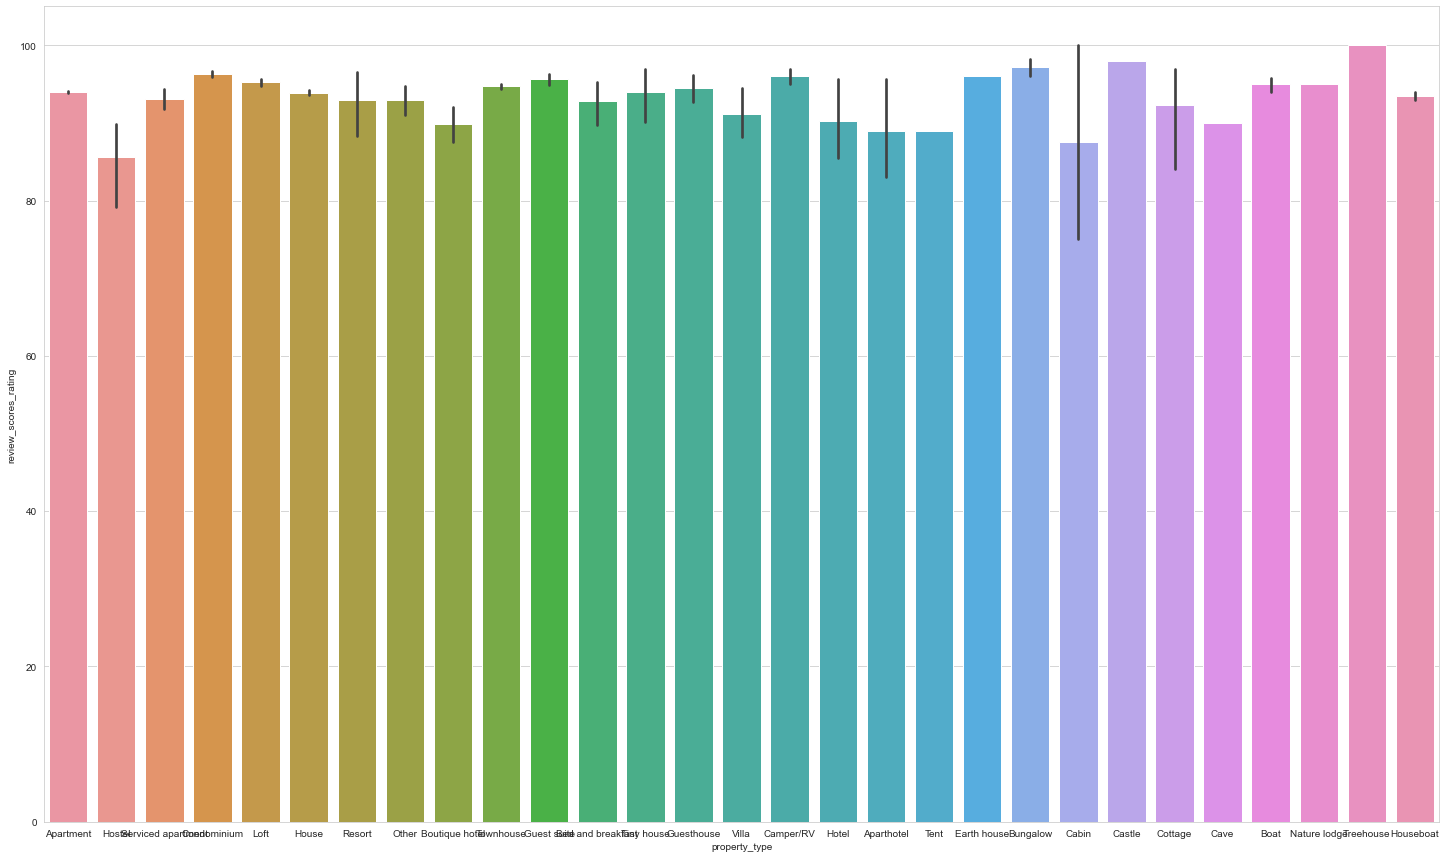

In [1006]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(Airbnb['property_type'], Airbnb['review_scores_rating'])

<AxesSubplot:xlabel='room_type', ylabel='review_scores_rating'>

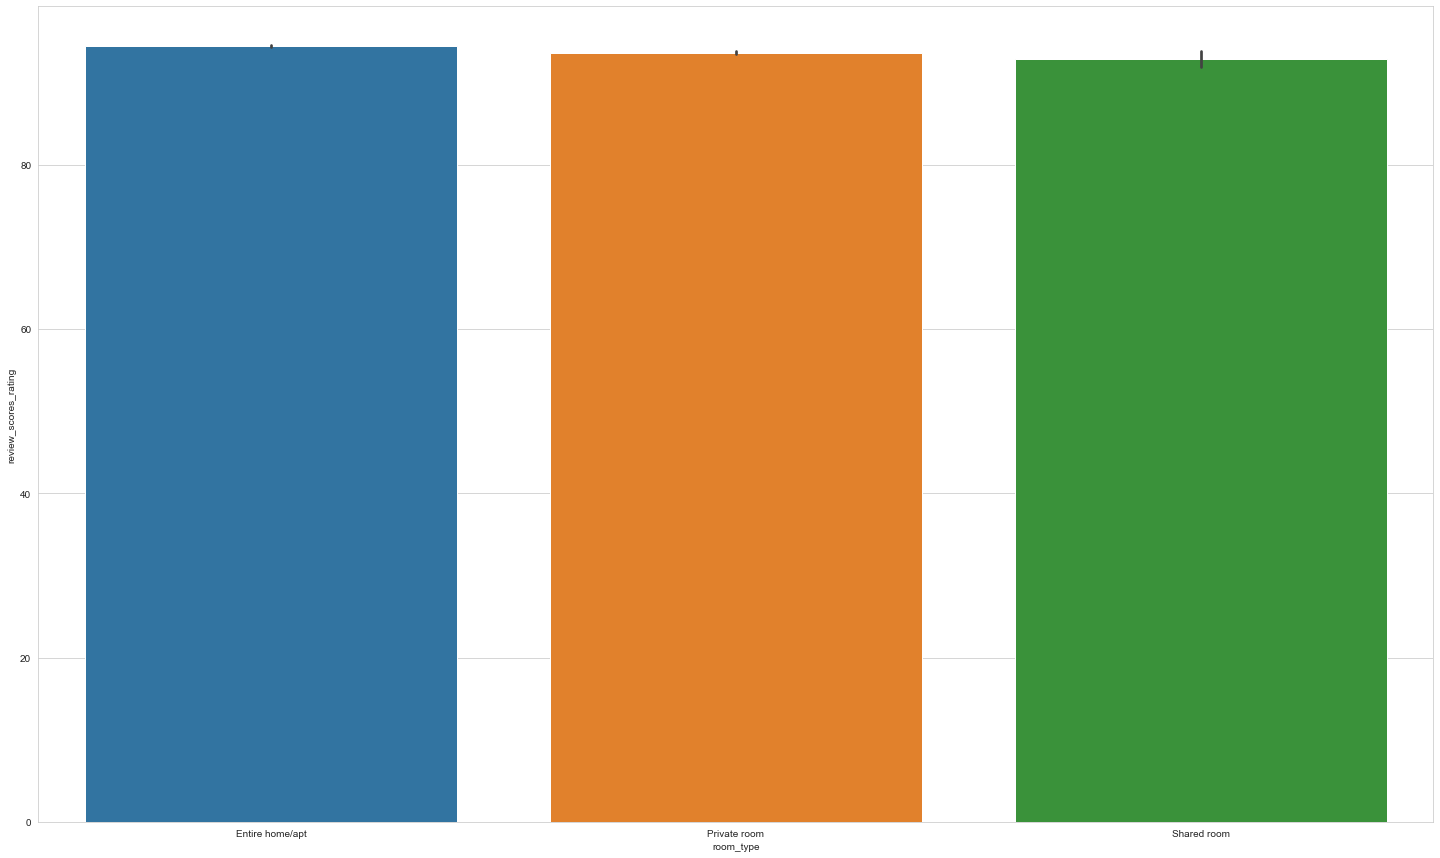

In [1007]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(Airbnb['room_type'], Airbnb['review_scores_rating'])

<AxesSubplot:xlabel='cancellation_policy', ylabel='review_scores_rating'>

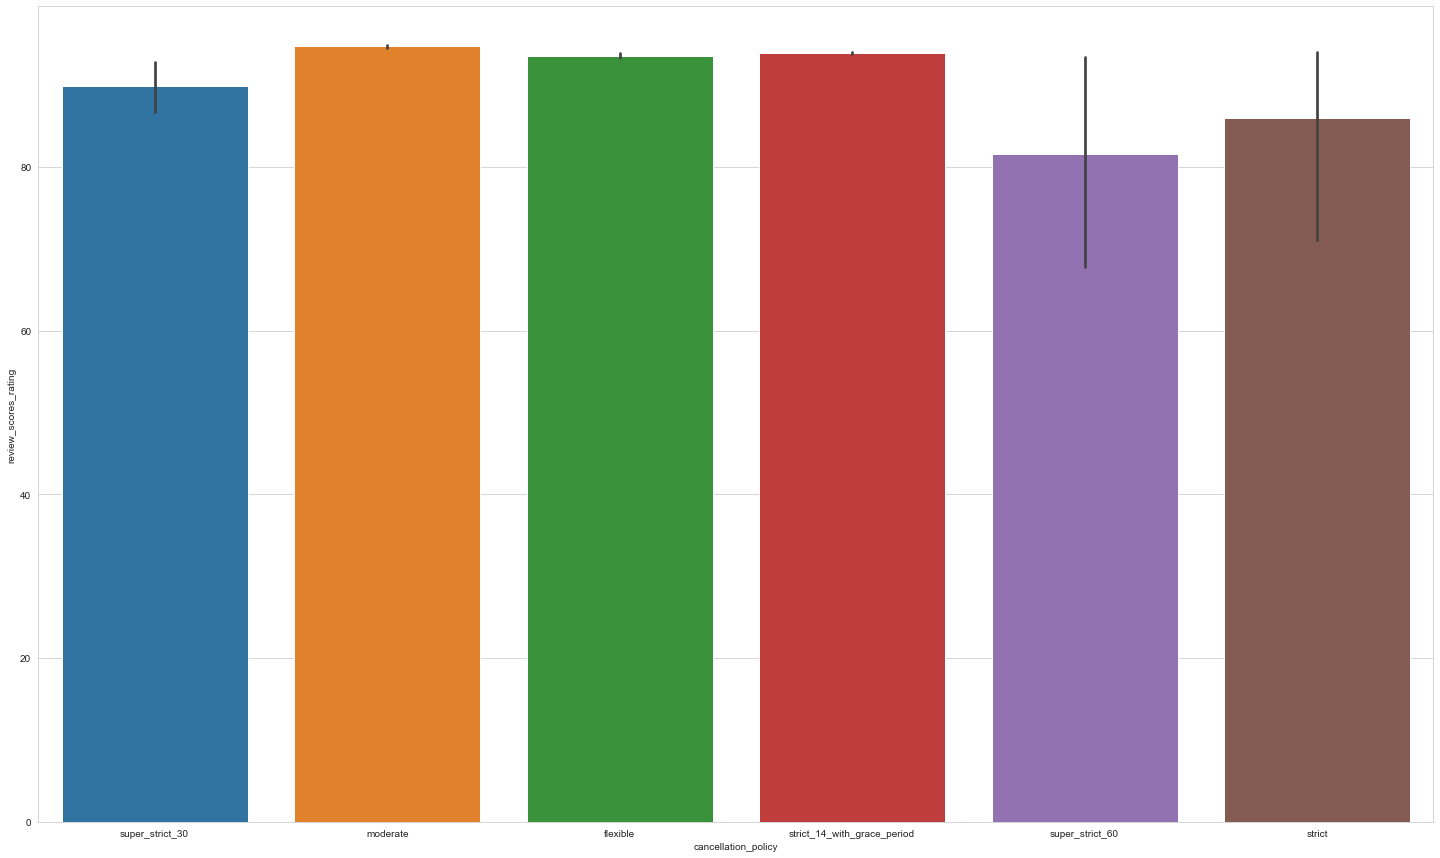

In [1008]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(Airbnb['cancellation_policy'], Airbnb['review_scores_rating'])

In [1009]:
#one-hot encoding change categorical variable to dummy variable
dummy1 = pd.get_dummies(Airbnb[['host_response_time', 'property_type', 
            'room_type', 'cancellation_policy','city']], drop_first=True)
Airbnb = pd.concat([Airbnb, dummy1], axis=1)

In [1011]:
Airbnb = Airbnb.drop(['host_response_time', 'property_type', 'city',
            'room_type', 'cancellation_policy'], 1)

In [1013]:
X=Airbnb.drop(['review_scores_rating'],axis=1,inplace=True)
y=Airbnb['review_scores_rating']

In [1110]:
#Train_test split
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
sc=StandardScaler()
X=sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1111]:
#build mape function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [1095]:
#Linear regression with cross validation
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)
param_grid = [{'n_features_to_select': range(1, 20,1)}]
lm = LinearRegression() 
lm.fit(X_train, y_train)  
rfe = RFE(lm)             
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = param_grid, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
linear_regressor=model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 19 candidates, totalling 95 fits


In [1096]:
model_cv.best_params_

{'n_features_to_select': 18}

In [1097]:
y_pred1 = linear_regressor.predict(X_test)  
rmse = np.sqrt(MSE(y_test, y_pred1))
mape=MAPE(y_test, y_pred1)
print("MAPE : % f" %(mape))
print("RMSE : % f" %(rmse))

MAPE :  4.421614
RMSE :  5.808045


In [1081]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)
param_grid = {'max_depth': [4,8,10],'min_samples_leaf': range(100, 400, 200),
              'min_samples_split': range(200, 500, 200),
              'n_estimators': [100,200,300,400,500],'max_features': range(5, 20, 5)}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=folds, n_jobs = -1,verbose = 1)

In [1082]:
#frid search on hyper-parameter
regressor=grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10],
                         'max_features': range(5, 20, 5),
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [1083]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 15,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 400}

In [1084]:
#random forest regressor
#regressor = RandomForestRegressor(n_estimators = 100,min_samples_leaf=100,
#min_samples_split=200, max_depth=10, random_state = 0)
#regressor.fit(X_train, y_train) 
y_pred2 = regressor.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred2))
mape=MAPE(y_test, y_pred2)
print("MAPE : % f" %(mape))
print("RMSE : % f" %(rmse))

MAPE :  4.493331
RMSE :  5.928754


In [1039]:
#xg-boosting regressor
import xgboost as xg
xgb = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb.fit(X_train, y_train)  
y_pred3 = xgb.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred3))
mape=MAPE(y_test, y_pred3)
print("MAPE : % f" %(mape))
print("RMSE : % f" %(rmse))

[13:43:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
MAPE :  5.375884
RMSE :  6.299776


In [1026]:
_feature_names=Airbnb.drop(['review_scores_rating'],axis=1).columns

Index(['host_since', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'accommodates', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_365', 'number_of_reviews', 'review_scores_communication',
       'review_scores_location', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'review_diff',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Boat',
       

In [1028]:
#random forest feature importance
def visualize_feature_importance(data, forest):
    importances = forest.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(20,20))
    plt.title("Feature importance")
    plt.barh(range(data.shape[1]), importances[indices],
            align="center")
    plt.yticks(range(data.shape[1]), data.columns[indices])
    plt.ylim([-1, data.shape[1]])

    fig = plt.gcf()
    fig.tight_layout()
    plt.show()

Matplotlib is building the font cache; this may take a moment.


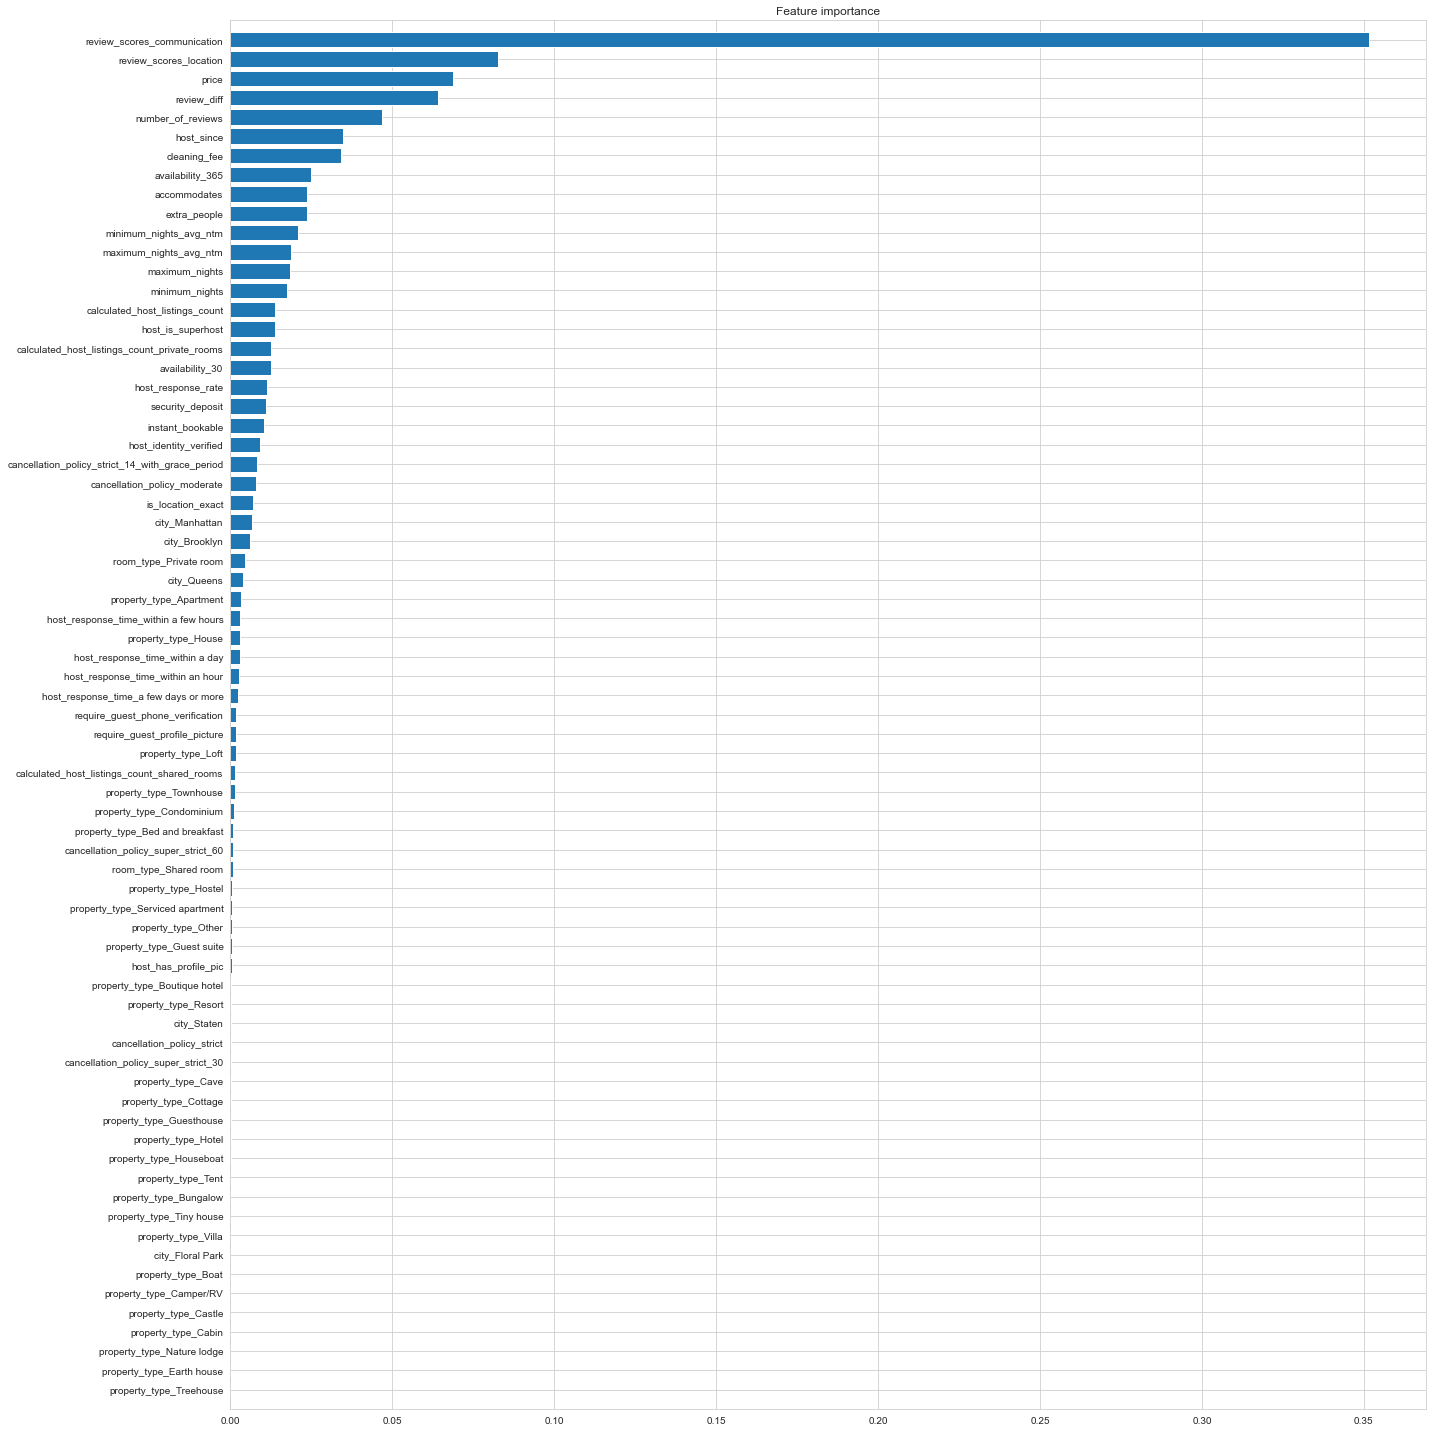

In [1029]:
_data = pd.DataFrame(X, columns=_feature_names)
visualize_feature_importance(_data, regressor)

<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

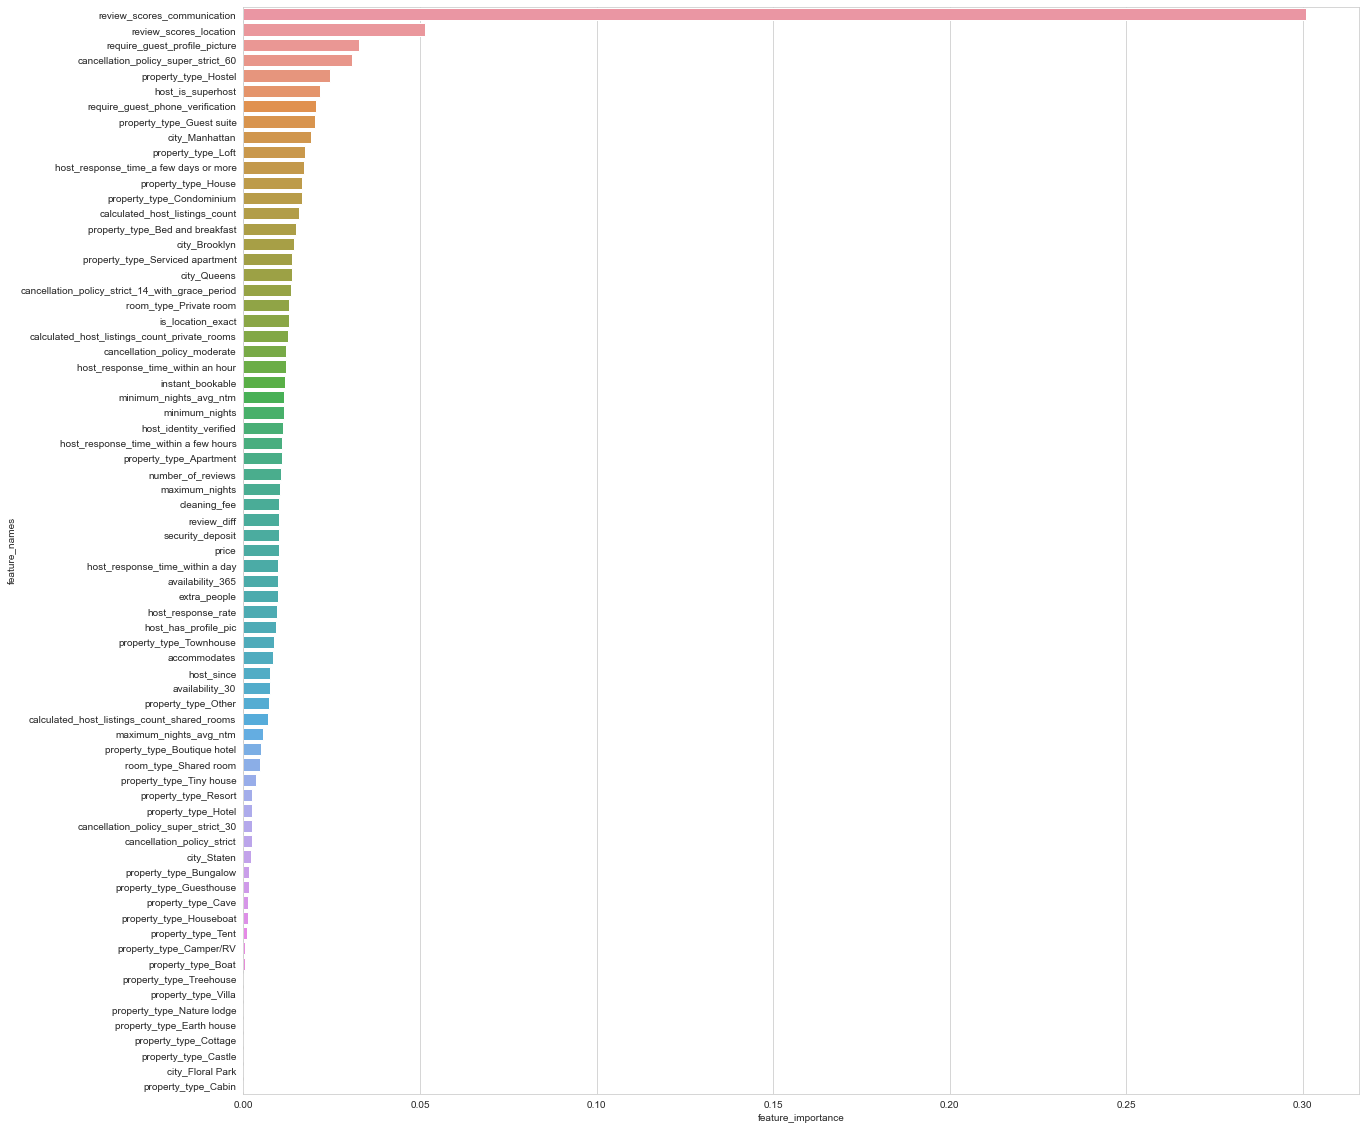

In [1032]:
#xgboost feature importance
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y)
# plot feature importance
feature_importance = xgb.feature_importances_
#feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
#sorted_idx = np.argsort(feature_importance)[:30]
data={'feature_names':X.columns,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(20,20))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

In [1040]:
import statsmodels.api as sm

In [1042]:
#p-value and coeefiecient from linear regression
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)))
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     review_scores_rating   No. Observations:                21120
Model:                              GLM   Df Residuals:                    21048
Model Family:                  Gaussian   Df Model:                           71
Link Function:                 identity   Scale:                          32.571
Method:                            IRLS   Log-Likelihood:                -66717.
Date:                  Sat, 27 Nov 2021   Deviance:                   6.8556e+05
Time:                          13:46:34   Pearson chi2:                 6.86e+05
No. Iterations:                       3                                         
Covariance Type:              nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              11.4312      2.640      4.331      0.000       6.258      16.605
host_since                                          0.0559      0.024      2.336      0.019       0.009       0.103
host_response_rate                                  0.0178      0.005      3.264      0.001       0.007       0.028
host_is_superhost                                   2.1571      0.106     20.320      0.000       1.949       2.365
host_has_profile_pic                               -1.3898      0.969     -1.435      0.151      -3.289       0.509
host_identity_verified                              0.1993      0.089      2.245      0.025       0.025       0.373
is_location_exact                                  -0.0630      0.116     -0.542      0.588      -0.291       0.165
accommodates                                       -0.0827      0.028     -2.980      0.003      -0.137      -0.028
price                                               0.0022      0.000      4.580      0.000       0.001       0.003
security_deposit                                    0.0008      0.000      2.304      0.021       0.000       0.001
cleaning_fee                                        0.0003      0.001      0.293      0.770      -0.002       0.002
extra_people                                        0.0013      0.002      0.611      0.541      -0.003       0.006
minimum_nights                                     -0.0068      0.003     -2.511      0.012      -0.012      -0.001
maximum_nights                                      0.0008      0.004      0.208      0.835      -0.007       0.008
minimum_nights_avg_ntm                              0.0057      0.002      2.936      0.003       0.002       0.010
maximum_nights_avg_ntm                             -0.0011      0.004     -0.286      0.775      -0.009       0.006
availability_30                                    -0.0144      0.005     -2.719      0.007      -0.025      -0.004
availability_365                                   -0.0011      0.000     -2.521      0.012      -0.002      -0.000
number_of_reviews                                  -0.0048      0.001     -5.175      0.000      -0.007      -0.003
review_scores_communication                         5.7584      0.069     83.426      0.000       5.623       5.894
review_scores_location                              2.7219      0.059     46.006      0.000       2.606       2.838
instant_bookable                                   -0.2109      0.092     -2.298      0.022      -0.391      -0.031
require_guest_profile_picture                      -0.6578      0.344     -1.914      0.056      -1.331       0.016
require_guest_phone_verification             